In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
files=['North','South','Coastal']

In [60]:
def learn(x,y,m,c,epoch):
    for i in range(epoch):
        error=y-(m*x+c)
        x_error=(y-(m*x+c))*x
        error=np.sum(error)/len(x)
        x_error=np.sum(x_error)/len(x_error)
        learning_rate=0.01
        delta_m=learning_rate*x_error
        delta_c=learning_rate*error
        m+=delta_m
        c+=delta_c
    return(m,c)

In [61]:
data1=pd.read_csv("data sets/District wise karnataka.csv")
x = [list(row) for row in data1.values]

In [62]:
data = pd.read_csv('data sets/'+files[1]+'.csv')

In [63]:
data

,Region,Year,Annual,Rabi,Kharif
0,SOUTH INTERIOR KARNATAKA,1901,83.583333,24.000000,59.575000
1,SOUTH INTERIOR KARNATAKA,1902,85.008333,20.091667,64.925000
2,SOUTH INTERIOR KARNATAKA,1903,105.825000,22.316667,83.508333
3,SOUTH INTERIOR KARNATAKA,1904,70.483333,30.233333,40.258333
4,SOUTH INTERIOR KARNATAKA,1905,63.283333,21.825000,41.466667
...,...,...,...,...,...
110,SOUTH INTERIOR KARNATAKA,2011,90.616667,30.641667,59.966667
111,SOUTH INTERIOR KARNATAKA,2012,73.150000,20.383333,52.783333
112,SOUTH INTERIOR KARNATAKA,2013,92.558333,27.391667,65.158333
113,SOUTH INTERIOR KARNATAKA,2014,98.683333,25.375000,73.300000


In [64]:
x=data.Year.to_numpy()
ya=data.Annual.to_numpy()
yr=data.Rabi.to_numpy()
yk=data.Kharif.to_numpy()
x=x/2025
yk=yk/2025
yr=yr/2025
ya=ya/2025

In [65]:
m,c = np.random.random(),np.random.random()

In [66]:
ma,ca = learn(x,ya,m,c,200000)

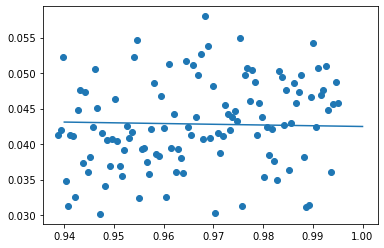

In [67]:
x1a=[0.94,1]
y1a=[0.94*ma+ca,1*ma+ca]
plt.scatter(x,ya)
plt.plot(x1a,y1a)

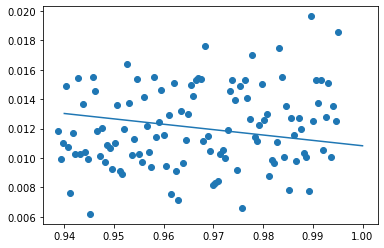

In [68]:
mr,cr=learn(x,yr,m,c,200000)
x1r=[0.94,1]
y1r=[0.94*mr+cr,1*mr+cr]
plt.scatter(x,yr)
plt.plot(x1r,y1r)

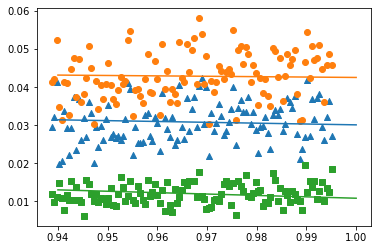

In [69]:
mk,ck=learn(x,yk,m,c,200000)
x1k=[0.94,1]
y1k=[0.94*mk+ck,1*mk+ck]
plt.scatter(x,yk,marker="^")
plt.scatter(x,ya,marker="o")
plt.scatter(x,yr,marker="s")
plt.plot(x1k,y1k)
plt.plot(x1a,y1a)
plt.plot(x1r,y1r)

In [70]:
print("Annual rainfall for 2021 =",(2021/2025*ma+ca)*2025)
print("Kharif rainfall for 2021 =",(2021/2025*mk+ck)*2025)
print("Rabi rainfall for 2021   =",(2021/2025*mr+cr)*2025)

Annual rainfall for 2021 = 86.07509232860892
Kharif rainfall for 2021 = 60.96510518248536
Rabi rainfall for 2021   = 22.076983162932496


In [71]:
correction=list()
for i in range(1):
    ma,ca = learn(x,ya,m,c,100000)
    mr,cr=learn(x,yr,m,c,100000)
    mk,ck=learn(x,yk,m,c,100000)
    ann=(2021/2025*ma+ca)*2025
    rab=(2021/2025*mr+cr)*2025
    kha=(2021/2025*mk+ck)*2025
    correction.append(abs(ann-rab-kha)*100/ann)
print(100-(sum(correction)/len(correction)))

95.90678918164443


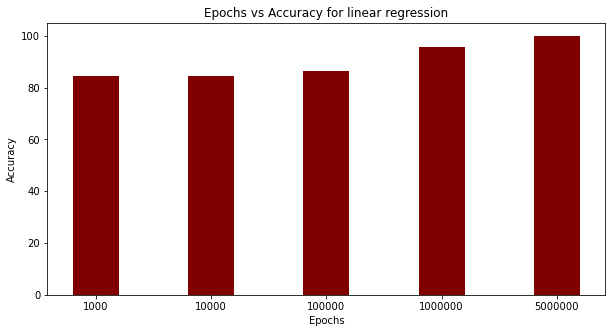

In [72]:
data = {'1000':84.47890644531627, '10000':84.64995005055832, '100000':86.27148357417093,
        '1000000':95.76103949272935,'5000000':99.98285986013197}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy for linear regression")
plt.show()